In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial
from math import pi
from numpy import sin
from numpy import cos
from cmath import sqrt
from scipy import special
from numpy import exp
from scipy import optimize
from numpy import log
from numpy import tanh
from scipy.optimize import fsolve
from scipy.optimize import brentq

In [2]:
def G_R(n,sigma,U):
    matsubara = 1j * T * pi * (2*n+1)
    factor = matsubara + U/2 - sigma
    result_positive = factor / 2 + 0.5 * sqrt(factor ** 2 - 4)
    #print(result_positive)
    result_negative = factor / 2 - 0.5 * sqrt(factor ** 2 - 4)
    #print(result_negative)
    if result_positive.imag < 0 and matsubara.imag > 0:
        result = result_positive
    if result_positive.imag > 0 and matsubara.imag < 0:
        result = result_positive
    if result_negative.imag < 0 and matsubara.imag > 0:
        result = result_negative
    if result_negative.imag > 0 and matsubara.imag < 0:
        result = result_negative
    return result

In [3]:
def G_0(n,sigma,U):
    return 1 / (1/G_R(n,sigma,U) + sigma)

In [4]:
def G_new(n,sigma,U):
    return 0.5 * G_0(n,sigma,U) + 0.5 * 1/(1/G_0(n,sigma,U) - U)

In [5]:
steps = 100
T = 1.0
U_temp = 1.0
w_list = np.linspace(-2.0, 2.0, num=steps)
n_list = np.linspace(-1000, 1000, num=steps)
sigma_list = []
retarded_list = []
tol = 0.001

for i in range(steps):
    #print(i)
    sigma_temp = 0.0
    old_sigma = sigma_temp
    retarded = G_R(n_list[i], sigma_temp, U_temp)
    #print(retarded)
    nonint = G_0(n_list[i], sigma_temp, U_temp)
    new = G_new(n_list[i], sigma_temp, U_temp)
    new_sigma = 1 / nonint - 1 / new
    
    while abs(new_sigma - old_sigma) > tol:
        old_sigma = new_sigma
        retarded = G_R(n_list[i], old_sigma, U_temp)
        nonint = G_0(n_list[i], old_sigma, U_temp)
        new = G_new(n_list[i], old_sigma, U_temp)
        new_sigma = 1 / nonint - 1 / new
    sigma_list.append(new_sigma)
    #print('Sigma = ',sigma_list[i])
    retarded_list.append(G_R(n_list[i], sigma_list[i], U_temp))
    #print(retarded_final)

In [6]:
dos_list = []
for i in range(len(retarded_list)):
    dos_list.append(-1 / pi * retarded_list[i].imag)
matsubara_frequency = []
for i in range(len(n_list)):
    matsubara_frequency.append(1*T*pi*(2*n_list[i]+1))

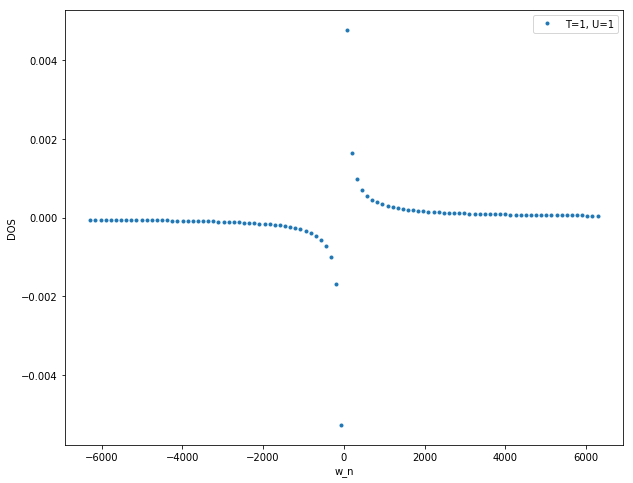

In [7]:
plt.figure(figsize = (10, 8))
plt.ylabel('DOS')
plt.xlabel('w_n')
#plt.xlim(-2.0, 4.0)
plt.plot(matsubara_frequency, dos_list, '.', label = 'T=1, U=1')
plt.legend()
plt.show()

In [196]:
def Greal_R(w,sigma,U):
    #matsubara = 1j * T * pi * (2*n+1)
    tol = 0.00001
    result = 0j
    factor = w + U/2 - sigma
    result_positive = factor / 2 + 0.5 * sqrt(factor ** 2 - 4)
    #print(result_positive)
    result_negative = factor / 2 - 0.5 * sqrt(factor ** 2 - 4)
    #print(result_negative)
    if result_positive.imag < (-1*tol):
        result = result_positive
    elif result_negative.imag < (-1*tol):
        result = result_negative
    else:
        if abs(result_positive) < 1:
            result = result_positive
        elif abs(result_negative) < 1:
            result = result_negative
        else:
            result = -1
            #print('hey weirdo.')
    return result

In [9]:
def Greal_0(w,sigma,U):
    return 1 / (1/Greal_R(w,sigma,U) + sigma)

In [10]:
def Greal_new(w,sigma,U):
    return 0.5 * Greal_0(w,sigma,U) + 0.5 * 1/(1/Greal_0(w,sigma,U) - U)

In [257]:
steps = 1000
U_temp = 1.0
w_list = np.linspace(-10.0, 10.0, num=steps)
#n_list = np.linspace(-1000, 1000, num=steps)
sigma_list = []
retardedreal_list = []
tol = 0.001
'''
for i in range(steps):
    #print(i)
    sigma_temp = 0.0
    old_sigma = sigma_temp
    retarded = Greal_R(w_list[i], sigma_temp, U_temp)
    #print(retarded)
    nonint = 1/(1/retarded + old_sigma)
    new = 0.5 * nonint + 0.5 * 1/(1/nonint - U_temp)
    new_sigma = 1 / nonint - 1 / new
    
    for j in range(steps):
        old_sigma = new_sigma
        retarded = Greal_R(w_list[i], old_sigma, U_temp)
        #print(w_list[i],retarded)
        nonint = 1/(1/retarded + old_sigma)
        new = 0.5 * nonint + 0.5 * 1/(1/nonint - U_temp)
        new_sigma = 1 / nonint - 1 / new
    sigma_list.append(new_sigma)
    #print('Sigma = ',sigma_list[i])
    retardedreal_list.append(Greal_R(w_list[i], sigma_list[i], U_temp))
    #print(retarded_final)
'''    

"\nfor i in range(steps):\n    #print(i)\n    sigma_temp = 0.0\n    old_sigma = sigma_temp\n    retarded = Greal_R(w_list[i], sigma_temp, U_temp)\n    #print(retarded)\n    nonint = 1/(1/retarded + old_sigma)\n    new = 0.5 * nonint + 0.5 * 1/(1/nonint - U_temp)\n    new_sigma = 1 / nonint - 1 / new\n    \n    for j in range(steps):\n        old_sigma = new_sigma\n        retarded = Greal_R(w_list[i], old_sigma, U_temp)\n        #print(w_list[i],retarded)\n        nonint = 1/(1/retarded + old_sigma)\n        new = 0.5 * nonint + 0.5 * 1/(1/nonint - U_temp)\n        new_sigma = 1 / nonint - 1 / new\n    sigma_list.append(new_sigma)\n    #print('Sigma = ',sigma_list[i])\n    retardedreal_list.append(Greal_R(w_list[i], sigma_list[i], U_temp))\n    #print(retarded_final)\n"

In [475]:
def get_gf(U):
    get_gf_list = []
    get_dos_list = []
    sigma_list = []
    retardedreal_list = []
    retardedimag_list = []
    tol = 0.001
    for i in range(steps):
    #print(i)
        sigma_temp = 0.0
        old_sigma = sigma_temp
        retarded = Greal_R(w_list[i], sigma_temp, U)
        #print(retarded)
        nonint = 1/(1/retarded + old_sigma)
        new = 0.5 * nonint + 0.5 * 1/(1/nonint - U)
        new_sigma = 1 / nonint - 1 / new
    
        for j in range(steps):
            old_sigma = new_sigma
            retarded = Greal_R(w_list[i], old_sigma, U)
            #print(w_list[i],retarded)
            nonint = 1/(1/retarded + old_sigma)
            new = 0.5 * nonint + 0.5 * 1/(1/nonint - U)
            new_sigma = 1 / nonint - 1 / new
        sigma_list.append(new_sigma)
        #print('Sigma = ',sigma_list[i])
        retardedreal_list.append(Greal_R(w_list[i], sigma_list[i], U).real)
        retardedimag_list.append(Greal_R(w_list[i], sigma_list[i], U).imag)
        #print(retarded_final)
        #get_dos_list.append(-1 / pi * retardedreal_list[i].imag)
    return retardedreal_list, retardedimag_list

def get_dos(U):
    get_dos_list = []
    sigma_list = []
    retardedreal_list = []
    tol = 0.001
    for i in range(steps):
    #print(i)
        sigma_temp = 0.0
        old_sigma = sigma_temp
        retarded = Greal_R(w_list[i], sigma_temp, U)
        #print(retarded)
        nonint = 1/(1/retarded + old_sigma)
        new = 0.5 * nonint + 0.5 * 1/(1/nonint - U)
        new_sigma = 1 / nonint - 1 / new
    
        for j in range(steps):
            old_sigma = new_sigma
            retarded = Greal_R(w_list[i], old_sigma, U)
            #print(w_list[i],retarded)
            nonint = 1/(1/retarded + old_sigma)
            new = 0.5 * nonint + 0.5 * 1/(1/nonint - U)
            new_sigma = 1 / nonint - 1 / new
        sigma_list.append(new_sigma)
        #print('Sigma = ',sigma_list[i])
        retardedreal_list.append(Greal_R(w_list[i], sigma_list[i], U))
        #print(retarded_final)
        get_dos_list.append(-1 / pi * retardedreal_list[i].imag)
    return get_dos_list

def get_sigma(U):
    real_sigma_list = []
    imag_sigma_list = []
    retardedreal_list = []
    tol = 0.001
    for i in range(steps):
    #print(i)
        sigma_temp = 0.0
        old_sigma = sigma_temp
        retarded = Greal_R(w_list[i], sigma_temp, U)
        #print(retarded)
        nonint = 1/(1/retarded + old_sigma)
        new = 0.5 * nonint + 0.5 * 1/(1/nonint - U)
        new_sigma = 1 / nonint - 1 / new
    
        for j in range(steps):
            old_sigma = new_sigma
            retarded = Greal_R(w_list[i], old_sigma, U)
            #print(w_list[i],retarded)
            nonint = 1/(1/retarded + old_sigma)
            new = 0.5 * nonint + 0.5 * 1/(1/nonint - U)
            new_sigma = 1 / nonint - 1 / new
        real_sigma_list.append(new_sigma.real)
        imag_sigma_list.append(new_sigma.imag)
        #print('Sigma = ',sigma_list[i])
        #retardedreal_list.append(Greal_R(w_list[i], sigma_list[i], U))
        #print(retarded_final)
    return real_sigma_list,imag_sigma_list

def get_residue(U):
    steps_temp = 200
    half_steps = int(steps_temp / 2)
    w_temp_list = np.linspace(-0.01, 0.01, num=steps_temp)
    real_sigma_list = []
    imag_sigma_list = []
    retardedreal_list = []
    residue_list = []
    tol = 0.001
    for i in range(steps_temp):
    #print(i)
        sigma_temp = 0.0
        old_sigma = sigma_temp
        retarded = Greal_R(w_temp_list[i], sigma_temp, U)
        #print(retarded)
        nonint = 1/(1/retarded + old_sigma)
        new = 0.5 * nonint + 0.5 * 1/(1/nonint - U)
        new_sigma = 1 / nonint - 1 / new
    
        for j in range(steps_temp):
            old_sigma = new_sigma
            retarded = Greal_R(w_temp_list[i], old_sigma, U)
            #print(w_list[i],retarded)
            nonint = 1/(1/retarded + old_sigma)
            new = 0.5 * nonint + 0.5 * 1/(1/nonint - U)
            new_sigma = 1 / nonint - 1 / new
        real_sigma_list.append(new_sigma.real)
        #imag_sigma_list.append(new_sigma.imag)
    residue = w_temp_list[half_steps] * real_sigma_list[half_steps]
        #residue_list.append(w_temp_list[i]*real_sigma_list[i])
        #print('Sigma = ',sigma_list[i])
        #retardedreal_list.append(Greal_R(w_list[i], sigma_list[i], U))
        #print(retarded_final)
    return residue

In [259]:
dos_1 = get_dos(1)
dos_10 = get_dos(2.09)

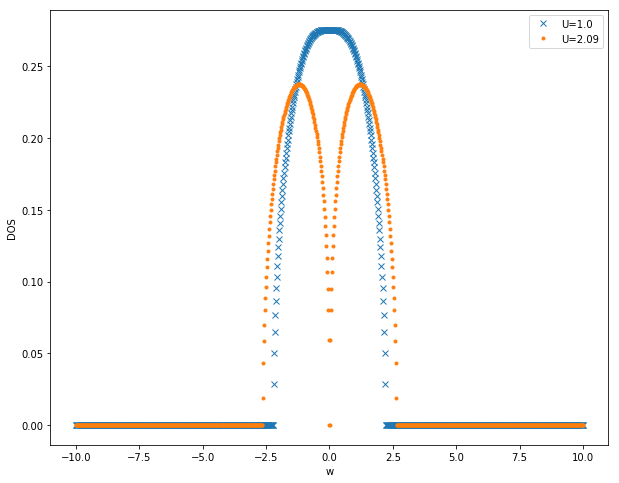

In [260]:
plt.figure(figsize = (10, 8))
plt.ylabel('DOS')
plt.xlabel('w')
#plt.xlim(-2.0, 4.0)
plt.plot(w_list, dos_1, 'x', label = 'U=1.0')
plt.plot(w_list, dos_10, '.', label = 'U=2.09')
plt.legend()
plt.show()

In [261]:
sigma_2real = get_sigma(2.09)[0]
sigma_2imag = get_sigma(2.09)[1]

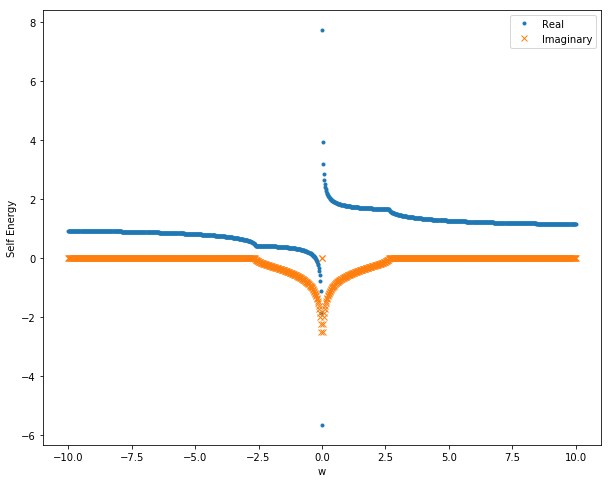

In [262]:
plt.figure(figsize = (10, 8))
plt.ylabel('Self Energy')
plt.xlabel('w')
#plt.xlim(-2.0, 4.0)
plt.plot(w_list, sigma_2real, '.', label = 'Real')
plt.plot(w_list, sigma_2imag, 'x', label = 'Imaginary')
plt.legend()
plt.show()

In [228]:
residue_list = []
U_list = np.linspace(1.75, 2.25, num=50)
for i in range(len(U_list)):
    residue_list.append(abs(get_residue(U_list[i])))

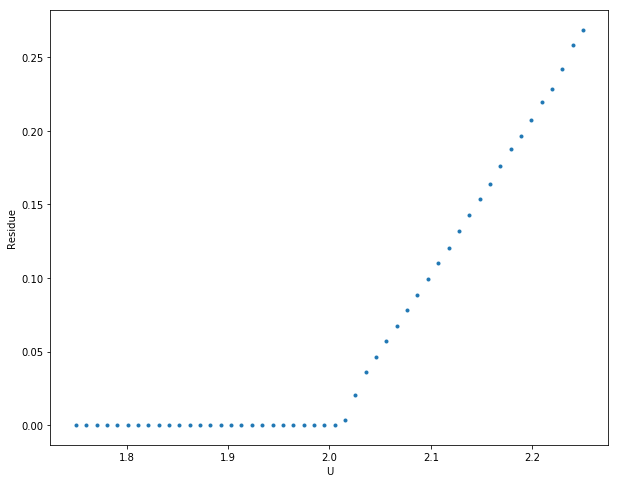

In [229]:
plt.figure(figsize = (10, 8))
plt.ylabel('Residue')
plt.xlabel('U')
plt.plot(U_list, residue_list, '.')
plt.show()

In [476]:
real_gf_1 = get_gf(1)[0]
real_gf_2 = get_gf(2.09)[0]

In [477]:
imag_gf_1 = get_gf(1)[1]
imag_gf_2 = get_gf(2.09)[1]

In [539]:
real_sigma_1 = get_sigma(1)[0]
real_sigma_2 = get_sigma(2.09)[0]
imag_sigma_1 = get_sigma(1)[1]
imag_sigma_2 = get_sigma(2.09)[1]

In [520]:
def kk_imag_gf(w):
    integral_result = np.zeros(steps)
    
    for i in range(steps):
        for j in range(steps):
            if i != j:
                integral_result[i] += w[j]/(i-j)
    return integral_result / pi

In [512]:
def kk_real_gf(w):
    integral_result = np.zeros(steps)
    
    for i in range(steps):
        for j in range(steps):
            if i != j:
                integral_result[i] += w[j]/(j-i)
    return integral_result / pi

In [560]:
def kk_real_sigma(w):
    integral_result = np.zeros(steps)
    
    for i in range(steps):
        for j in range(steps):
            if i != j:
                integral_result[i] += w[j]/(j-i)
    return integral_result / pi

def kk_imag_sigma(w):
    integral_result = np.zeros(steps)
    
    for i in range(steps):
        for j in range(steps):
            if i != j:
                integral_result[i] += (w[j]-1)/(i-j)
    return integral_result / pi

In [496]:
k_real_gf_1 = kk_real_gf(imag_gf_1)
k_real_gf_2 = kk_real_gf(imag_gf_2)

In [521]:
k_imag_gf_1 = kk_imag_gf(real_gf_1)
k_imag_gf_2 = kk_imag_gf(real_gf_2)

In [544]:
k_real_sigma_1 = kk_real_sigma(imag_sigma_1) + 1/2
k_real_sigma_2 = kk_real_sigma(imag_sigma_2) + 1

In [561]:
#k_imag_sigma_1 = kk_imag_sigma(real_sigma_1)
k_imag_sigma_2 = kk_imag_sigma(real_sigma_2)

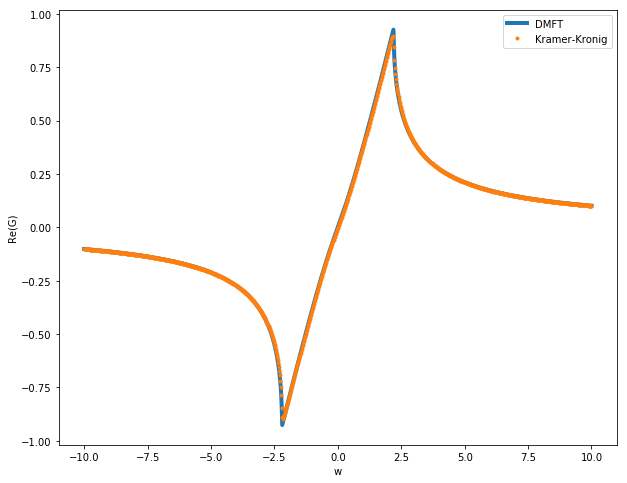

In [509]:
plt.figure(figsize = (10, 8))
plt.ylabel('Re(G)')
plt.xlabel('w')
plt.plot(w_list, real_gf_1, linewidth = 4, label = 'DMFT')
#plt.plot(w_list, imag_gf_1, '.')
plt.plot(w_list, k_real_gf_1, '.', label = 'Kramer-Kronig')
plt.legend()
plt.show()

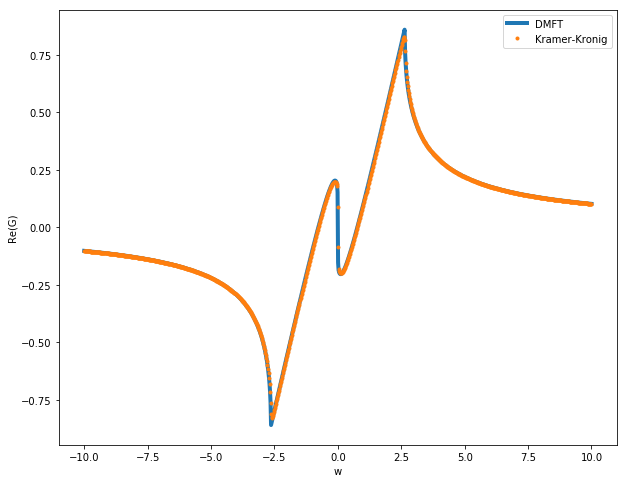

In [508]:
plt.figure(figsize = (10, 8))
plt.ylabel('Re(G)')
plt.xlabel('w')
plt.plot(w_list, real_gf_2, linewidth = 4, label = 'DMFT')
#plt.plot(w_list, imag_gf_1, '.')
plt.plot(w_list, k_real_gf_2, '.', label = 'Kramer-Kronig')
plt.legend()
plt.show()

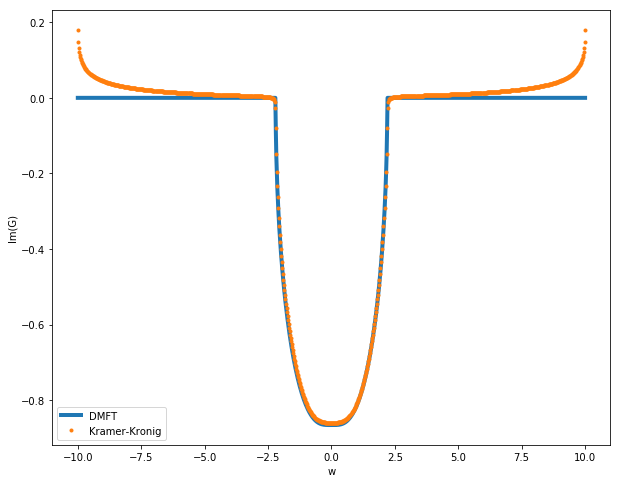

In [534]:
plt.figure(figsize = (10, 8))
plt.ylabel('Im(G)')
plt.xlabel('w')
plt.plot(w_list, imag_gf_1, linewidth = 4, label = 'DMFT')
plt.plot(w_list, k_imag_gf_1 - 0.06, '.', label = 'Kramer-Kronig')
plt.legend()
plt.show()

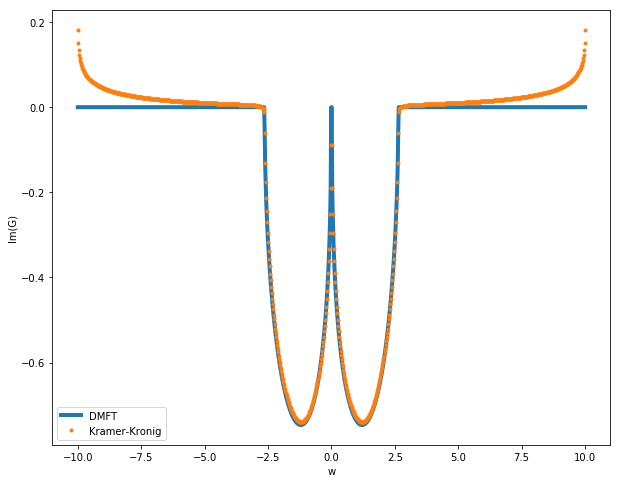

In [535]:
plt.figure(figsize = (10, 8))
plt.ylabel('Im(G)')
plt.xlabel('w')
plt.plot(w_list, imag_gf_2, linewidth = 4, label = 'DMFT')
plt.plot(w_list, k_imag_gf_2 - 0.06, '.', label = 'Kramer-Kronig')
plt.legend()
plt.show()

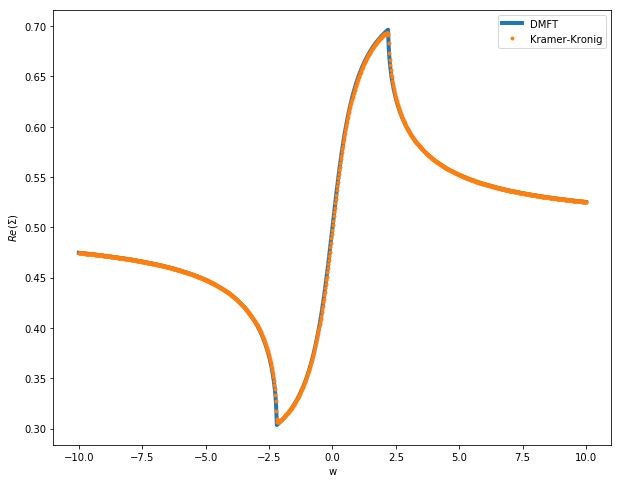

In [548]:
plt.figure(figsize = (10, 8))
plt.ylabel(r'$Re(\Sigma)$')
plt.xlabel('w')
plt.plot(w_list, (real_sigma_1), linewidth = 4, label = 'DMFT')
#plt.plot(w_list, imag_gf_1, '.')
plt.plot(w_list, k_real_sigma_1, '.', label = 'Kramer-Kronig')
plt.legend()
plt.show()

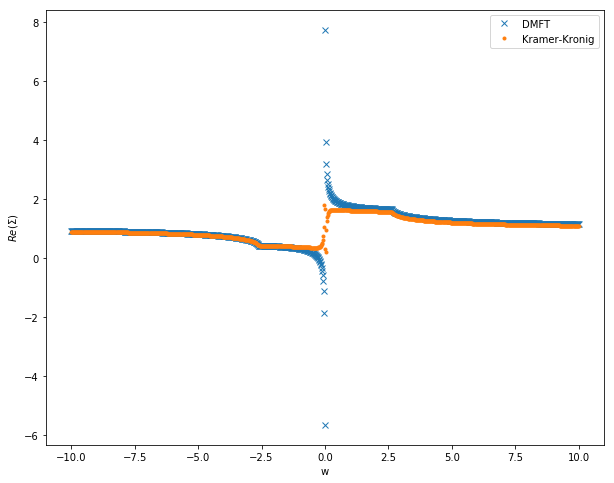

In [549]:
plt.figure(figsize = (10, 8))
plt.ylabel(r'$Re(\Sigma)$')
plt.xlabel('w')
plt.plot(w_list, (real_sigma_2), 'x', linewidth = 4, label = 'DMFT')
#plt.plot(w_list, imag_gf_1, '.')
plt.plot(w_list, k_real_sigma_2, '.', label = 'Kramer-Kronig')
plt.legend()
plt.show()

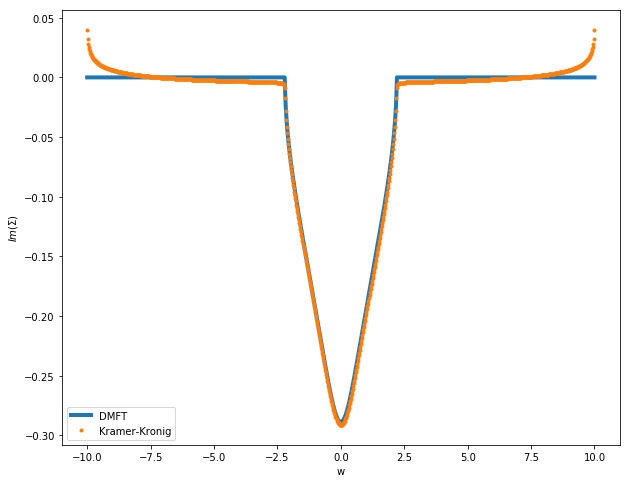

In [559]:
plt.figure(figsize = (10, 8))
plt.ylabel(r'$Im(\Sigma)$')
plt.xlabel('w')
plt.plot(w_list, imag_sigma_1, linewidth = 4, label = 'DMFT')
plt.plot(w_list, k_imag_sigma_1 - 0.02, '.', label = 'Kramer-Kronig')
plt.legend()
plt.show()

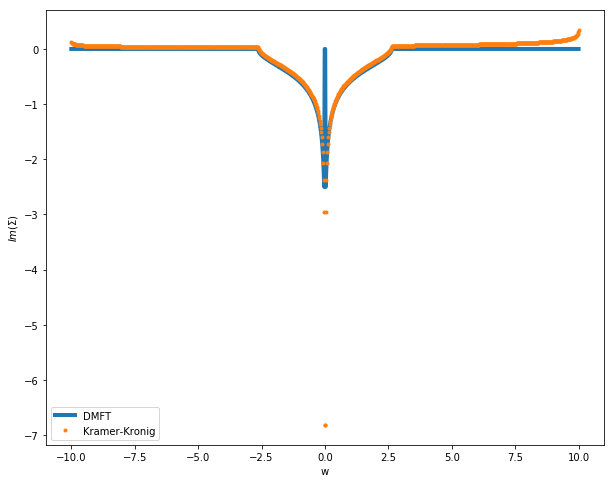

In [563]:
plt.figure(figsize = (10, 8))
plt.ylabel(r'$Im(\Sigma)$')
plt.xlabel('w')
plt.plot(w_list, imag_sigma_2, linewidth = 4, label = 'DMFT')
plt.plot(w_list, k_imag_sigma_2 - 0.02, '.', label = 'Kramer-Kronig')
plt.legend()
plt.show()